In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from cdlib import algorithms, viz

import warnings 
warnings.filterwarnings("ignore")

C:\Users\Someone\anaconda\Anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Someone\anaconda\Anaconda\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\Someone\anaconda\Anaconda\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


### Data Description
+ Collaboration network of Arxiv High Energy Physics category (there is an edge if authors coauthored at least one paper)
- Nodes: 12008 Edges: 118521

In [2]:
df= nx.read_edgelist("Collab_data.txt", 
                     create_using = nx.Graph(), nodetype = int)
print(nx.info(df))

Name: 
Type: Graph
Number of nodes: 12008
Number of edges: 118521
Average degree:  19.7403


In [3]:
number_of_triangles = sum(nx.triangles(df).values()) / 3

print(f"Number of Triangles: {number_of_triangles}")

Number of Triangles: 3358499.0


## Centrality Measures

### Degree Centrality
+ This is a Centrality measure of the number of edges connected to a node.
+ The nodes with the highest degree centrality represent most popular actors; in our case - authors that are most collaborated with 

In [4]:
most_popular = nx.degree_centrality(df)

In [5]:
print("Top 5 most collaborated authors\n")
for ix, w in enumerate(sorted(most_popular, key = most_popular.get, reverse = True)):
    if ix==5:
        break
    else:
        print(f'ActorID: {w}   Degree: {most_popular[w]}')

Top 5 most collaborated authors

ActorID: 71788   Degree: 0.04089281252602648
ActorID: 8168   Degree: 0.040476388773215626
ActorID: 33111   Degree: 0.040143249770966935
ActorID: 17284   Degree: 0.03697842924960439
ActorID: 40942   Degree: 0.03689514449904222


### Eigenvector Centraility
+ Eigenvector centrality is used to measure the level of influence of a node within a network
+ It assigns weight to each edge of an actor based on the popularity the node connected to that edge

In [6]:
most_influential = nx.eigenvector_centrality(df)

In [7]:
print("Top 5 Most Influential Co-authors\n")
for ix, w in enumerate(sorted(most_influential, key = most_influential.get, reverse = True)):
    if ix==5:
        break
    else:
        print(f'ActorID: {w}   eigenvector: {most_influential[w]}')

Top 5 Most Influential Co-authors

ActorID: 33111   eigenvector: 0.07016565449187318
ActorID: 8168   eigenvector: 0.07015646223870228
ActorID: 40942   eigenvector: 0.07003900764002577
ActorID: 75297   eigenvector: 0.07003018651516504
ActorID: 88290   eigenvector: 0.06923623605933021


### Betweenness Centrality
- It represents the frequency at which a point occurs on the shortest paths that connected pair of points.
- These acts as the most strategic actors that plays significant role in the information flow between the network

In [8]:
most_strategic = nx.betweenness_centrality(df)

In [9]:
print("Top 5 Most Strategic Co-authors\n")
for ix, w in enumerate(sorted(most_strategic, key = most_strategic.get, reverse = True)):
    if ix==5:
        break
    else:
        print(f'ActorID: {w}, Betweenness: {most_strategic[w]}')

Top 5 Most Strategic Co-authors

ActorID: 19732, Betweenness: 0.028024733870829793
ActorID: 42179, Betweenness: 0.01789884413774989
ActorID: 28271, Betweenness: 0.014485729551393428
ActorID: 37531, Betweenness: 0.012840075617680814
ActorID: 29392, Betweenness: 0.012350804348006585


In [10]:
btw_df = pd.DataFrame({'node':list(most_stategic.keys()),'between': list(most_stategic.values())})
btw_df.head()

NameError: name 'most_stategic' is not defined

In [ ]:
_ = btw_df.to_csv('betweenness nodes.csv')

### Visualization of Network
- Node color variation: Degree
- Node size variation:  Degree Centrality

(-1.0429606944322587,
 1.0942230135202409,
 -1.0984481215476989,
 1.0674105525016784)

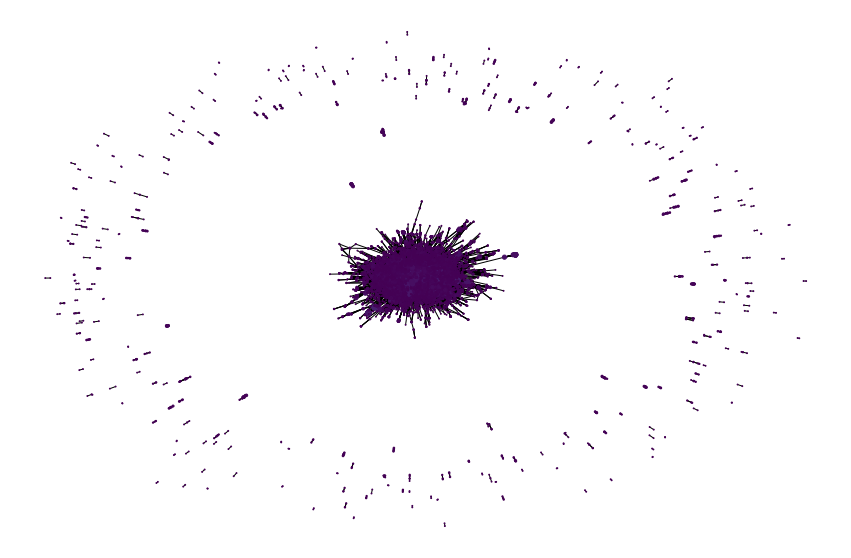

In [11]:
pos = nx.spring_layout(df)
node_color = [20000.0 * df.degree(i) for i in df]
node_size = [10000*i for i in most_popular.values()]
plt.figure(figsize = (15,10))
nx.draw_networkx(df, pos=pos, with_labels = False, node_color= node_color, node_size = node_size)
plt.axis('off')

## Louvain Community Detection Algorithm

In [12]:
cd = algorithms. louvain(df, weight = 'weight', resolution =1)

pos = nx.spring_layout(df)

### Cummunity detectection plot

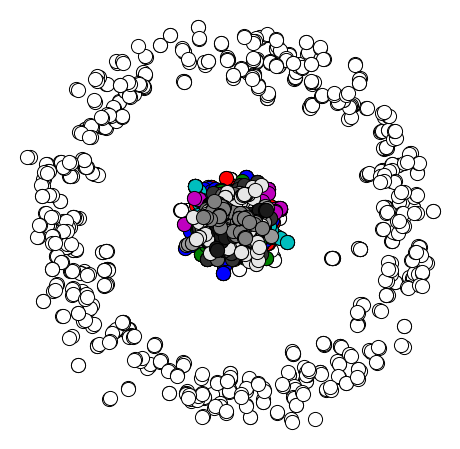

In [13]:
## Community detection plot
viz.plot_network_clusters(df, cd, pos)

### Center of cummunity detected

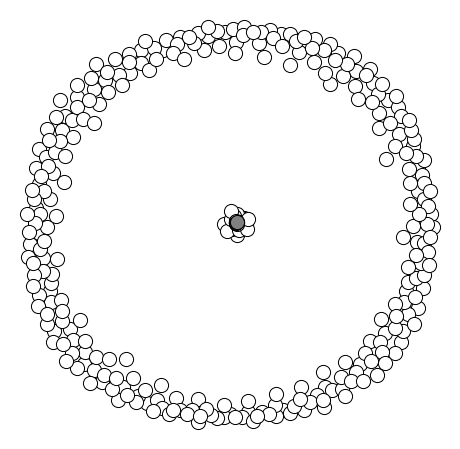

In [14]:
## Center of each community
viz.plot_community_graph(df, cd)